In [4]:
import sqlite3
import pandas as pd
import numpy as np
import selenium 
import psycopg2
import sys 
import matplotlib.pyplot as plt

In [5]:
db_conn = sqlite3.connect('database2.sqlite')

In [6]:
theCursor = db_conn.cursor()

In [7]:
query = theCursor.execute('select * from ascent;') 

In [8]:
cols = [column[0] for column in query.description]
results= pd.DataFrame.from_records(data = query.fetchall(), columns = cols)

In [9]:
results.shape

(4111877, 28)

In [10]:
results.head()

,id,user_id,grade_id,notes,raw_notes,method_id,climb_type,total_score,date,year,...,country,comment,rating,description,yellow_id,climb_try,repeat,exclude_from_ranking,user_recommended,chipped
0,2,1,36,,0,3,0,545,918342000,1999,...,THA,Thailand\n,0,,255,0,0,0,0,0
1,3,1,36,,0,3,0,545,925509600,1999,...,,\n,0,,0,0,0,0,0,0
2,4,1,36,,0,3,0,545,933026400,1999,...,SWE,\n,0,,255,0,0,0,0,0
3,5,1,36,,0,3,0,545,933026400,1999,...,SWE,\n,0,,255,0,0,0,0,0
4,6,1,36,,0,3,0,545,933458400,1999,...,,\n,0,,0,0,0,0,0,0


In [11]:
query = theCursor.execute('select * from Climber;') 
cols = [column[0] for column in query.description]
climber_df= pd.DataFrame.from_records(data = query.fetchall(), columns = cols)

In [12]:
climber_df.head()

,id,first_name,last_name,city,country,sex,height,weight,started,competitions,...,sponsor2,sponsor3,best_area,worst_area,guide_area,interests,birth,presentation,deactivated,anonymous
0,1,first,last,Göteborg,SWE,0,177,73,1996,,...,,,"Railay beach, Krabi, Thailand",None,,,1976-03-10,,0,0
1,2,first,last,stockholm,SWE,0,0,0,2000,,...,,,,,,,None,,0,0
2,3,first,last,Umeå,SWE,0,180,78,1995,,...,,,Hell,Umeå,,,1973-09-09,,0,0
3,4,first,last,Goteborg,SWE,1,165,58,2001,,...,,,,None,,,1984-07-26,,0,0
4,5,first,last,North Attleboro,USA,0,0,0,1991,,...,,,,None,,,1969-05-07,,0,0


In [13]:
climber_df[climber_df.id == 1476]

,id,first_name,last_name,city,country,sex,height,weight,started,competitions,...,sponsor2,sponsor3,best_area,worst_area,guide_area,interests,birth,presentation,deactivated,anonymous
1422,1476,first,last,Brno,CZE,0,185,68,1999,World cup lead and bouldering winner,...,Black Diamond,La Sportiva,"Flatanger, anywhere in Spain, Gemona",None,Moravsky kras,snowboarding,1993-02-05,my other sponsors:\r\nTendon www.mytendon.cz\r...,0,0


In [14]:
results.user_id

0              1
1              1
2              1
3              1
4              1
           ...  
4111872    59627
4111873    44075
4111874    19098
4111875    19098
4111876    24751
Name: user_id, Length: 4111877, dtype: int64

In [15]:
df = results.merge(climber_df, left_on='user_id', right_on='id')

In [16]:
df.columns

Index(['id_x', 'user_id', 'grade_id', 'notes', 'raw_notes', 'method_id',
       'climb_type', 'total_score', 'date', 'year', 'last_year', 'rec_date',
       'project_ascent_date', 'name', 'crag_id', 'crag', 'sector_id', 'sector',
       'country_x', 'comment', 'rating', 'description', 'yellow_id',
       'climb_try', 'repeat', 'exclude_from_ranking', 'user_recommended',
       'chipped', 'id_y', 'first_name', 'last_name', 'city', 'country_y',
       'sex', 'height', 'weight', 'started', 'competitions', 'occupation',
       'sponsor1', 'sponsor2', 'sponsor3', 'best_area', 'worst_area',
       'guide_area', 'interests', 'birth', 'presentation', 'deactivated',
       'anonymous'],
      dtype='object')

<AxesSubplot:>

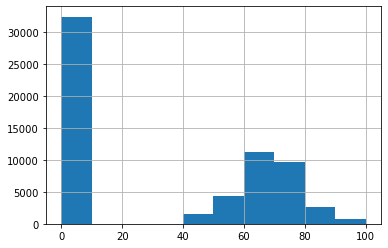

In [17]:
climber_df.weight.hist()

In [18]:
#df['bmi'] = df['height']/((df['Column B'])/1000)**2

In [19]:
df_weight = df[df['weight'] !=0]

In [20]:
df_weight.weight.value_counts()

68     734733
73     661486
63     565711
78     329281
58     260935
83     160744
53     142021
48      67616
88      50206
100     44661
43      17653
93      17309
40      14718
98       8008
Name: weight, dtype: int64

Text(0.5, 1.0, 'Difficulty Distribution of Climbers w/ no null weight')

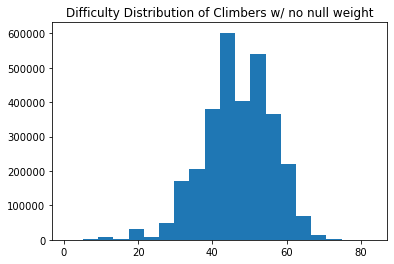

In [21]:
plt.hist(x = df_weight.grade_id, bins = 20)
plt.title('Difficulty Distribution of Climbers w/ no null weight')

In [22]:
# df_height = 

In [23]:
df_height = df[df['height'] !=0]

Text(0.5, 1.0, 'Difficulty Distribution of Climbers w/ no null height')

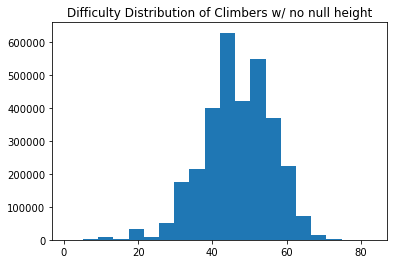

In [24]:
plt.hist(x = df_height.grade_id, bins = 20)
plt.title('Difficulty Distribution of Climbers w/ no null height')

In [25]:
df_weight.weight.value_counts()

68     734733
73     661486
63     565711
78     329281
58     260935
83     160744
53     142021
48      67616
88      50206
100     44661
43      17653
93      17309
40      14718
98       8008
Name: weight, dtype: int64

In [26]:
df_height.height.value_counts()

180    274383
178    230141
175    200869
170    194286
183    156406
        ...  
105         3
8           3
84          3
207         2
35          1
Name: height, Length: 157, dtype: int64

In [27]:
df2 = df.copy()

In [28]:
df2['bmi'] = (df['weight']/(df['height'])/(df['height']))*10000

In [29]:
df2.bmi.value_counts()

0.000000       316415
inf            209258
20.987654       83841
21.461937       79860
22.530864       76334
                ...  
15.253123           1
2098.765432         1
14.872100           1
27.587326           1
169.005102          1
Name: bmi, Length: 730, dtype: int64

In [30]:
df2.iloc[1]

id_x                                                3
user_id                                             1
grade_id                                           36
notes                                                
raw_notes                                           0
method_id                                           3
climb_type                                          0
total_score                                       545
date                                        925509600
year                                             1999
last_year                                           0
rec_date                                   1107126000
project_ascent_date                                 0
name                                           vet ej
crag_id                                             0
crag                                 Nya berg - segl.
sector_id                                           0
sector                                               
country_x                   

In [31]:
df2_bmi = df2[df2['bmi'] != 0] 
df2_bmi = df2_bmi[df2_bmi['bmi'] != np.inf]
#___________________________________________
df2_bmi = df2_bmi[df2_bmi['bmi'].notna()]


df2_bmi = df2_bmi[df2_bmi['bmi'] < 75] 

In [32]:
df2_bmi.head()

,id_x,user_id,grade_id,notes,raw_notes,method_id,climb_type,total_score,date,year,...,sponsor3,best_area,worst_area,guide_area,interests,birth,presentation,deactivated,anonymous,bmi
0,2,1,36,,0,3,0,545,918342000,1999,...,,"Railay beach, Krabi, Thailand",None,,,1976-03-10,,0,0,23.301095
1,3,1,36,,0,3,0,545,925509600,1999,...,,"Railay beach, Krabi, Thailand",None,,,1976-03-10,,0,0,23.301095
2,4,1,36,,0,3,0,545,933026400,1999,...,,"Railay beach, Krabi, Thailand",None,,,1976-03-10,,0,0,23.301095
3,5,1,36,,0,3,0,545,933026400,1999,...,,"Railay beach, Krabi, Thailand",None,,,1976-03-10,,0,0,23.301095
4,6,1,36,,0,3,0,545,933458400,1999,...,,"Railay beach, Krabi, Thailand",None,,,1976-03-10,,0,0,23.301095


In [33]:
#df2_bmi = df2[df2['bmi'] != np.inf] 

In [34]:
df2_bmi.bmi.value_counts()

20.987654    83841
21.461937    79860
22.530864    76334
21.799308    73436
22.204082    69954
             ...  
15.908689        1
15.431503        1
21.915355        1
15.319690        1
21.566513        1
Name: bmi, Length: 622, dtype: int64

In [35]:
elite_bmi = df2_bmi[df2_bmi['grade_id'] >=59]

In [36]:
elite_bmi.id_y.nunique()

7335

In [37]:
elite_bmi2 = elite_bmi.copy()

In [38]:
elite_bmi2.columns

Index(['id_x', 'user_id', 'grade_id', 'notes', 'raw_notes', 'method_id',
       'climb_type', 'total_score', 'date', 'year', 'last_year', 'rec_date',
       'project_ascent_date', 'name', 'crag_id', 'crag', 'sector_id', 'sector',
       'country_x', 'comment', 'rating', 'description', 'yellow_id',
       'climb_try', 'repeat', 'exclude_from_ranking', 'user_recommended',
       'chipped', 'id_y', 'first_name', 'last_name', 'city', 'country_y',
       'sex', 'height', 'weight', 'started', 'competitions', 'occupation',
       'sponsor1', 'sponsor2', 'sponsor3', 'best_area', 'worst_area',
       'guide_area', 'interests', 'birth', 'presentation', 'deactivated',
       'anonymous', 'bmi'],
      dtype='object')

In [39]:
elite_climber_df = elite_bmi2.drop(['id_x', 'user_id', 'grade_id', 'notes', 'raw_notes', 'method_id',
       'climb_type', 'total_score', 'date', 'year', 'last_year', 'rec_date',
       'project_ascent_date', 'name', 'crag_id', 'crag', 'sector_id', 'sector',
       'country_x', 'comment', 'rating', 'description', 'yellow_id',
       'climb_try', 'repeat', 'exclude_from_ranking', 'user_recommended',
       'chipped'], axis=1)

In [40]:
elite_bmi2.shape

(278954, 51)

In [41]:
elite_climber_df.shape

(278954, 23)

In [42]:
elite_climber_df.drop_duplicates(keep='last', inplace = True)

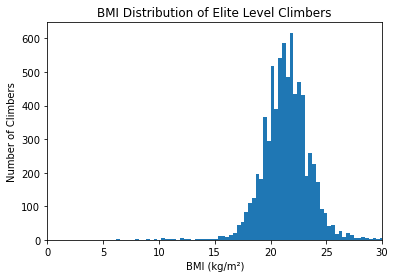

In [43]:
plt.hist(x = elite_climber_df.bmi, bins = 200)
plt.title('BMI Distribution of Elite Level Climbers')
plt.xlim(0, 30)
plt.ylabel('Number of Climbers')
plt.xlabel('BMI (kg/m²)')

plt.savefig('elite_climber_bmi.png', dpi = 200)
# plt.xlim(0, 22250)

In [44]:
elite_climber_df.bmi.value_counts().sort_values(ascending=False)

20.987654    232
22.530864    204
21.461937    191
21.799308    191
22.204082    187
            ... 
16.066482      1
28.703704      1
31.239414      1
26.861207      1
26.674874      1
Name: bmi, Length: 437, dtype: int64

In [45]:
elite_climber_df.bmi.sort_values(ascending=False)

921344     73.784722
961925     69.444444
2193960    69.444444
295418     69.444444
149439     68.000000
             ...    
2555974     9.688581
766586      8.919646
4051370     8.150711
2047223     6.349106
1683701     6.151480
Name: bmi, Length: 7335, dtype: float64

In [46]:
elite_climber_df.shape

(7335, 23)

In [47]:
elite_climber_df[elite_climber_df.bmi >50000]

,id_y,first_name,last_name,city,country_y,sex,height,weight,started,competitions,...,sponsor3,best_area,worst_area,guide_area,interests,birth,presentation,deactivated,anonymous,bmi


In [48]:
delete_df = elite_climber_df[elite_climber_df['id_y'] == 3474]

In [49]:
elite_climber_df[elite_climber_df['id_y'] == 3474]

,id_y,first_name,last_name,city,country_y,sex,height,weight,started,competitions,...,sponsor3,best_area,worst_area,guide_area,interests,birth,presentation,deactivated,anonymous,bmi


In [50]:
elite_climber_df.head()

,id_y,first_name,last_name,city,country_y,sex,height,weight,started,competitions,...,sponsor3,best_area,worst_area,guide_area,interests,birth,presentation,deactivated,anonymous,bmi
140,1,first,last,Göteborg,SWE,0,177,73,1996,,...,,"Railay beach, Krabi, Thailand",None,,,1976-03-10,,0,0,23.301095
486,11,first,last,Arkelstorp,SWE,0,175,73,1998,1:a,...,,Kjugekull,None,Kjugekull,"Play go, read books, listen to jazz and eating...",1980-01-09,,0,0,23.836735
560,6,first,last,Sydney,AUS,0,185,73,1992,last,...,,Sydney,None,,,1970-12-02,,0,0,21.329438
729,16,first,last,Egersund,NOR,0,177,68,1996,,...,,Rogaland ?,,"Sirevåg, Egersund",,1973-04-15,,0,0,21.705129
2805,10,first,last,Göteborg,SWE,0,167,63,1992,,...,,,None,,,1965-06-22,,0,0,22.589551


In [51]:
delete_df.weight

Series([], Name: weight, dtype: int64)

In [52]:
elite_climber_df[elite_climber_df.weight<25]

,id_y,first_name,last_name,city,country_y,sex,height,weight,started,competitions,...,sponsor3,best_area,worst_area,guide_area,interests,birth,presentation,deactivated,anonymous,bmi


In [53]:
elite_climber_df[elite_climber_df.height<30]

,id_y,first_name,last_name,city,country_y,sex,height,weight,started,competitions,...,sponsor3,best_area,worst_area,guide_area,interests,birth,presentation,deactivated,anonymous,bmi


In [54]:
high_bmi_elite = elite_climber_df[elite_climber_df.bmi>30]

<AxesSubplot:>

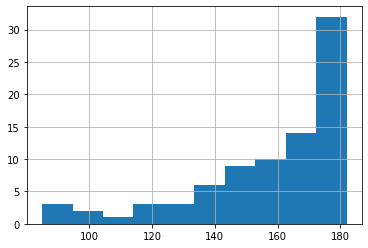

In [55]:
high_bmi_elite.height.hist()

<AxesSubplot:>

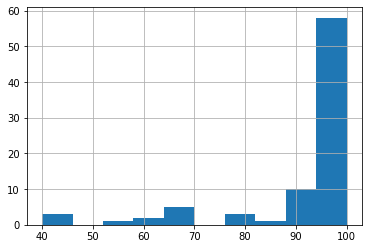

In [56]:
high_bmi_elite.weight.hist()

In [57]:
high_bmi_elite.weight.value_counts()

100    50
98      8
93      5
88      5
68      5
78      3
40      3
63      2
83      1
53      1
Name: weight, dtype: int64

In [58]:
weight_100 = high_bmi_elite[high_bmi_elite.weight >=100]

In [59]:
weight_100

,id_y,first_name,last_name,city,country_y,sex,height,weight,started,competitions,...,sponsor3,best_area,worst_area,guide_area,interests,birth,presentation,deactivated,anonymous,bmi
138370,1497,first,last,Bilbao,ESP,0,176,100,1998,,...,,,None,,,1977-08-20,,0,0,32.283058
142559,1552,first,last,Grenoble,FRA,0,150,100,1942,KGB,...,Mastoblax,blocs de lumbin,None,FNAC,engager comme un porc,1941-05-26,j'arrive pas a rentrer\r\nc'est quoi le code?,0,0,44.444444
158060,1779,first,last,Canada,CAN,0,180,100,2000,,...,,Lions Head,None,,,1974-05-18,,0,0,30.864198
264310,2817,first,last,Gosford,AUS,0,180,100,1997,2nd prize in a beauty contest,...,,,None,,,1978-06-10,,0,0,30.864198
271687,2913,first,last,Adelaide,AUS,0,175,100,1994,,...,,,,,,None,,0,0,32.653061
295418,3258,first,last,boulder,USA,0,120,100,2003,,...,,,None,,,None,,0,0,69.444444
324326,3655,first,last,Kølis og Bergen,NOR,1,170,100,2000,,...,,,None,,Gå på bingo.,None,,0,0,34.602076
506751,5566,first,last,Enschede,NLD,1,168,100,1999,,...,,,None,,,1979-01-12,,0,0,35.430839
583959,6572,first,last,Vienna,BEL,0,178,100,2000,,...,Monkee clothing,Wild Site/Elephanté/Céüse/Freyr/Vosges,None,,Beer and crisps,1985-06-28,"Sponsored by: La Sportiva, Monkee clothing, Ra...",0,0,31.561672
604892,6859,first,last,Bergen,NOR,0,160,100,2003,,...,,Lokøy,None,The bucketwall and Lokøy,"walks in the nature, wine with good friends.",None,Just started this wonderful sport. I like to t...,0,0,39.062500


In [60]:
big_guy = results[results.user_id == 3258]

In [61]:
big_guy.iloc[70]

id                                                                3279717
user_id                                                              3258
grade_id                                                               49
notes                                                                    
raw_notes                                                               0
method_id                                                               2
climb_type                                                              0
total_score                                                           753
date                                                           1385852400
year                                                                 2013
last_year                                                               0
rec_date                                                       1397440309
project_ascent_date                                                     0
name                                  

In [62]:
elite_climber_women_df = elite_climber_df[elite_climber_df.sex == 1]

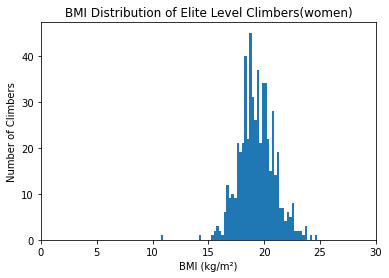

In [63]:
# elite_climber_women_df

plt.hist(x = elite_climber_women_df.bmi, bins = 200)
plt.title('BMI Distribution of Elite Level Climbers(women)')
plt.xlim(0, 30)
plt.ylabel('Number of Climbers')
plt.xlabel('BMI (kg/m²)')
plt.savefig('bmi_dist_elite_women.png', dpi = 200)

In [64]:
elite_climber_men_df = elite_climber_df[elite_climber_df.sex == 0]

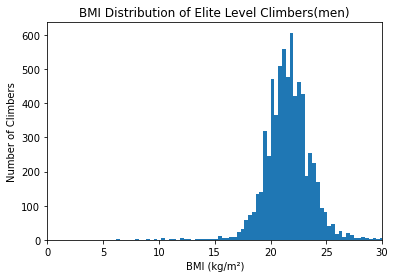

In [65]:
plt.hist(x = elite_climber_men_df.bmi, bins = 200)
plt.title('BMI Distribution of Elite Level Climbers(men)')
plt.xlim(0, 30)
plt.ylabel('Number of Climbers')
plt.xlabel('BMI (kg/m²)')
plt.savefig('bmi_dist_elite_men.png', dpi = 200)

In [66]:
df2.shape

(4110933, 51)

In [67]:
advance_bmi = df2_bmi[df2_bmi['grade_id'] >=52]

In [68]:
advance_bmi.shape

(833036, 51)

In [69]:
advance_bmi_2 = advance_bmi.copy()

In [70]:
advance_bmi_only = pd.merge(elite_bmi,advance_bmi, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)

In [71]:
cond = advance_bmi_2['id_x'].isin(elite_bmi['id_x'])
advance_bmi_2.drop(advance_bmi_2[cond].index, inplace = True)

# cond = df1['Email'].isin(df2['Email'])
# df1.drop(df1[cond].index, inplace = True)

In [72]:
advance_bmi_only.shape

(0, 51)

In [73]:
advance_bmi.shape

(833036, 51)

In [74]:
elite_bmi.shape

(278954, 51)

In [75]:
advance_bmi_2.shape

(554082, 51)

In [76]:
advance_bmi_2_dropped_cols = advance_bmi_2.drop(['id_x', 'user_id', 'grade_id', 'notes', 'raw_notes', 'method_id',
       'climb_type', 'total_score', 'date', 'year', 'last_year', 'rec_date',
       'project_ascent_date', 'name', 'crag_id', 'crag', 'sector_id', 'sector',
       'country_x', 'comment', 'rating', 'description', 'yellow_id',
       'climb_try', 'repeat', 'exclude_from_ranking', 'user_recommended',
       'chipped'], axis=1)

In [77]:
advance_bmi_2_dropped_cols.shape

(554082, 23)

In [78]:
advance_bmi_2_dropped_cols.drop_duplicates(keep='last', inplace = True)

In [79]:
advance_bmi_2_dropped_cols.shape

(12156, 23)

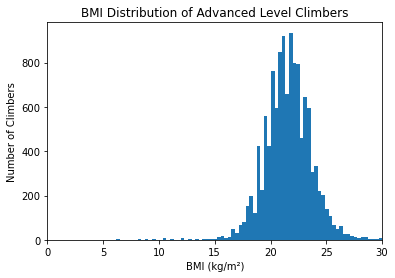

In [80]:
plt.hist(x = advance_bmi_2_dropped_cols.bmi, bins = 200)
plt.title('BMI Distribution of Advanced Level Climbers')
plt.xlim(0, 30)
plt.ylabel('Number of Climbers')
plt.xlabel('BMI (kg/m²)')

plt.savefig('advance_climber_bmi.png', dpi = 200)

In [81]:
advance_climber_women_df = advance_bmi_2_dropped_cols[advance_bmi_2_dropped_cols.sex == 1]

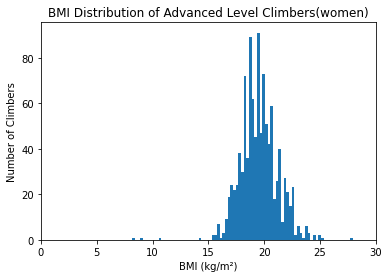

In [82]:
plt.hist(x = advance_climber_women_df.bmi, bins = 200)
plt.title('BMI Distribution of Advanced Level Climbers(women)')
plt.xlim(0, 30)
plt.ylabel('Number of Climbers')
plt.xlabel('BMI (kg/m²)')

plt.savefig('advance_climber_women_bmi.png', dpi = 200)

In [83]:
advance_climber_men_df = advance_bmi_2_dropped_cols[advance_bmi_2_dropped_cols.sex == 0]

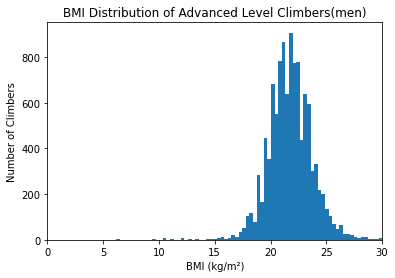

In [84]:
plt.hist(x = advance_climber_men_df.bmi, bins = 200)
plt.title('BMI Distribution of Advanced Level Climbers(men)')
plt.xlim(0, 30)
plt.ylabel('Number of Climbers')
plt.xlabel('BMI (kg/m²)')

plt.savefig('advance_climber_men_bmi.png', dpi = 200)

In [85]:
intermediate_bmi = df2_bmi[df2_bmi['grade_id'] >=45]

In [86]:
intermediate_bmi.shape

(1641979, 51)

In [87]:
intermediate_bmi_2 = intermediate_bmi.copy()

In [88]:
cond = intermediate_bmi_2['id_x'].isin(advance_bmi['id_x'])
intermediate_bmi_2.drop(intermediate_bmi_2[cond].index, inplace = True)

In [89]:
intermediate_bmi_2.shape

(808943, 51)

In [90]:
advance_bmi.shape

(833036, 51)

In [91]:
intermediate_bmi.shape

(1641979, 51)

In [92]:
elite_bmi.shape

(278954, 51)

In [93]:
intermediate_bmi_2_dropped_cols = intermediate_bmi_2.drop(['id_x', 'user_id', 'grade_id', 'notes', 'raw_notes', 'method_id',
       'climb_type', 'total_score', 'date', 'year', 'last_year', 'rec_date',
       'project_ascent_date', 'name', 'crag_id', 'crag', 'sector_id', 'sector',
       'country_x', 'comment', 'rating', 'description', 'yellow_id',
       'climb_try', 'repeat', 'exclude_from_ranking', 'user_recommended',
       'chipped'], axis=1)

In [94]:
intermediate_bmi_2_dropped_cols.shape

(808943, 23)

In [95]:
intermediate_bmi_2_dropped_cols.drop_duplicates(keep='last', inplace = True)

In [96]:
intermediate_bmi_2_dropped_cols.shape

(15504, 23)

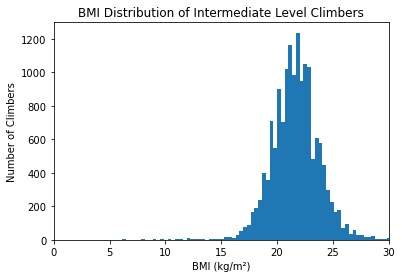

In [97]:
plt.hist(x = intermediate_bmi_2_dropped_cols.bmi, bins = 200)
plt.title('BMI Distribution of Intermediate Level Climbers')
plt.xlim(0, 30)
plt.ylabel('Number of Climbers')
plt.xlabel('BMI (kg/m²)')

plt.savefig('intermediate_climber_bmi.png', dpi = 200)

In [98]:
intermediate_climber_women_df = intermediate_bmi_2_dropped_cols[intermediate_bmi_2_dropped_cols.sex == 1]

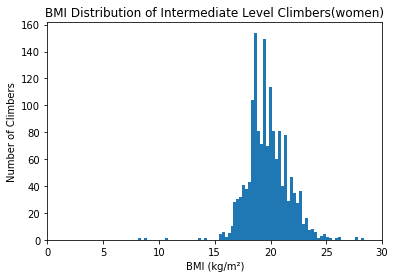

In [99]:
plt.hist(x = intermediate_climber_women_df.bmi, bins = 200)
plt.title('BMI Distribution of Intermediate Level Climbers(women)')
plt.xlim(0, 30)
plt.ylabel('Number of Climbers')
plt.xlabel('BMI (kg/m²)')

plt.savefig('intermediate_climber_women_bmi.png', dpi = 200)

In [100]:
intermediate_climber_men_df = intermediate_bmi_2_dropped_cols[intermediate_bmi_2_dropped_cols.sex == 0]

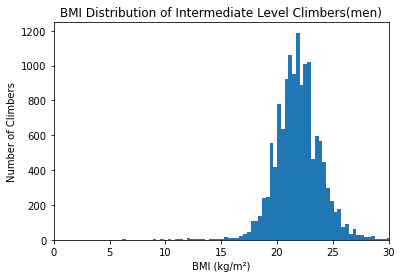

In [101]:
plt.hist(x = intermediate_climber_men_df.bmi, bins = 200)
plt.title('BMI Distribution of Intermediate Level Climbers(men)')
plt.xlim(0, 30)
plt.ylabel('Number of Climbers')
plt.xlabel('BMI (kg/m²)')

plt.savefig('intermediate_climber_men_bmi.png', dpi = 200)

In [102]:
intermediate_climber_men_df_test = intermediate_climber_men_df[intermediate_climber_men_df.bmi<35]

<AxesSubplot:>

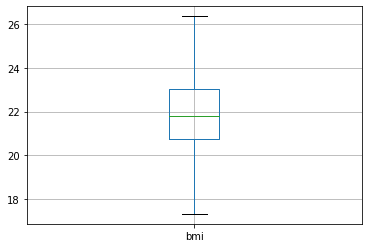

In [103]:

intermediate_climber_men_df_test.boxplot(column=['bmi'], showfliers=False )
# df.T.boxplot()
# plt.subplots_adjust(bottom=0.25)
# plt.xticks(rotation=25)
# plt.show()

<AxesSubplot:>

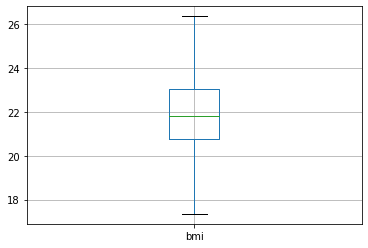

In [104]:
intermediate_climber_men_df.boxplot(column=['bmi'], showfliers=False )

In [105]:
bmi_df_only = intermediate_bmi_2_dropped_cols['bmi']

In [106]:
bmi_df_only

208        23.301095
384        23.836735
735        21.705129
1538       20.987654
1911       20.987654
             ...    
4110858    21.545091
4110863    22.204082
4110870    24.675500
4110881    24.618104
4110890    24.074074
Name: bmi, Length: 15504, dtype: float64

In [107]:
data = [intermediate_bmi_2_dropped_cols["bmi"], advance_bmi_2_dropped_cols["bmi"], elite_climber_df["bmi"]]
headers = ["intermediate bmi", "advanced bmi", 'elite bmi']

In [108]:
df_bmi_int_adv_elite = pd.concat(data, axis=1, keys=headers)

In [109]:
df_bmi_int_adv_elite.shape

(34995, 3)

# boulder work


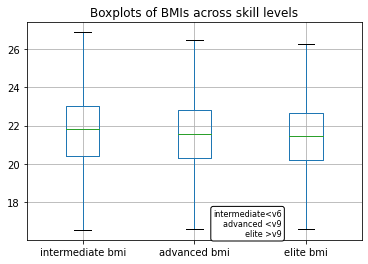

In [110]:
df_bmi_int_adv_elite.boxplot(column=['intermediate bmi', 'advanced bmi', 'elite bmi'], showfliers=False )
plt.title('Boxplots of BMIs across skill levels')
plt.annotate('intermediate<v6\nadvanced <v9\nelite >v9', xy=(255, 31), xycoords='axes points',
            size=8, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))
plt.savefig('Boxplots_all.png', dpi = 200);

In [111]:
data_women = [intermediate_climber_women_df["bmi"], advance_climber_women_df["bmi"], elite_climber_women_df["bmi"]]
headers = ["intermediate bmi", "advanced bmi", 'elite bmi']

In [112]:
df__women_bmi_int_adv_elite = pd.concat(data_women, axis=1, keys=headers)

No handles with labels found to put in legend.


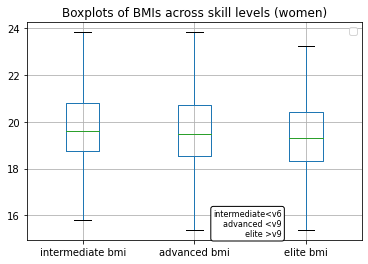

In [113]:
df__women_bmi_int_adv_elite.boxplot(column=['intermediate bmi', 'advanced bmi', 'elite bmi'], showfliers=False )
plt.title('Boxplots of BMIs across skill levels (women)')
# plt.legend(['intermediate<v6', 'advanced <v9', 'elite >=v10'],loc='best', fontsize = 'x-small', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.annotate('intermediate<v6\nadvanced <v9\nelite >v9', xy=(255, 31), xycoords='axes points',
            size=8, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))
plt.legend(handletextpad=-2.0, handlelength=0)
plt.savefig('Boxplots_women.png', dpi = 200);

In [114]:
data_men = [intermediate_climber_men_df["bmi"], advance_climber_men_df["bmi"], elite_climber_men_df["bmi"]]
headers = ["intermediate bmi", "advanced bmi", 'elite bmi']

In [115]:
df__men_bmi_int_adv_elite = pd.concat(data_men, axis=1, keys=headers)

No handles with labels found to put in legend.


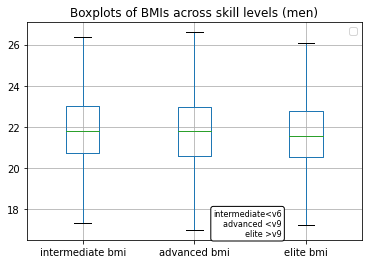

In [116]:
df__men_bmi_int_adv_elite.boxplot(column=['intermediate bmi', 'advanced bmi', 'elite bmi'], showfliers=False )
plt.title('Boxplots of BMIs across skill levels (men)')
# plt.legend(['intermediate<v6', 'advanced <v9', 'elite >=v10'],loc='best', fontsize = 'x-small', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.annotate('intermediate<v6\nadvanced <v9\nelite >v9', xy=(255, 31), xycoords='axes points',
            size=8, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))
plt.legend(handletextpad=-2.0, handlelength=0)
plt.savefig('Boxplots_men.png', dpi = 200);

<AxesSubplot:>

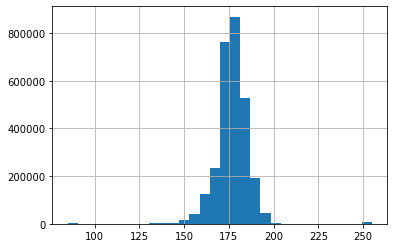

In [117]:
df2_bmi.height.hist(bins = 30)

<AxesSubplot:>

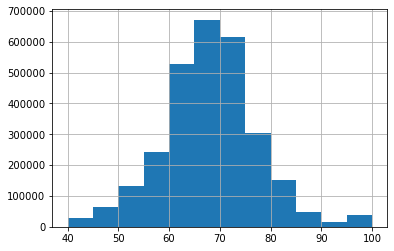

In [118]:
df2_bmi.weight.hist(bins = 12)

In [119]:
df2_bmi.shape

(2838761, 51)

In [120]:
all_climbers_no_null_weight_height = df2_bmi.drop(['id_x', 'user_id', 'grade_id', 'notes', 'raw_notes', 'method_id',
       'climb_type', 'total_score', 'date', 'year', 'last_year', 'rec_date',
       'project_ascent_date', 'name', 'crag_id', 'crag', 'sector_id', 'sector',
       'country_x', 'comment', 'rating', 'description', 'yellow_id',
       'climb_try', 'repeat', 'exclude_from_ranking', 'user_recommended',
       'chipped'], axis=1)

In [121]:
all_climbers_no_null_weight_height.shape

(2838761, 23)

In [122]:
all_climbers_no_null_weight_height.drop_duplicates(keep='last', inplace = True)

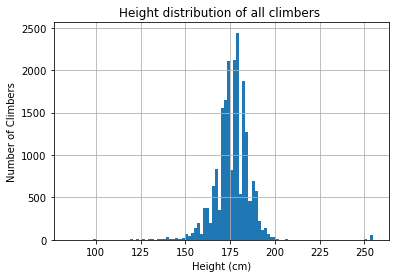

In [123]:
all_climbers_no_null_weight_height.height.hist(bins = 100)
plt.title('Height distribution of all climbers ')
# plt.xlim(0, 30)
plt.ylabel('Number of Climbers')
plt.xlabel('Height (cm)')

plt.savefig('Height_dist_all.png', dpi = 200)

<AxesSubplot:>

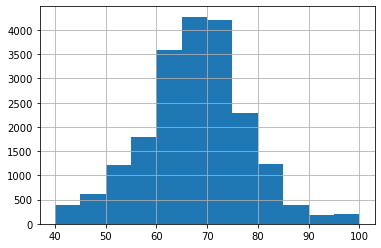

In [124]:
all_climbers_no_null_weight_height.weight.hist(bins = 12)

<AxesSubplot:>

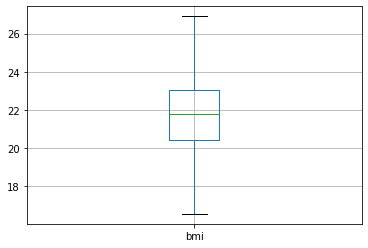

In [125]:
all_climbers_no_null_weight_height.boxplot(column=['bmi'], showfliers=False )

In [126]:
all_climbers_no_null_weight_height.shape

(20359, 23)

In [127]:
all_climbers_no_null_weight_height.columns

Index(['id_y', 'first_name', 'last_name', 'city', 'country_y', 'sex', 'height',
       'weight', 'started', 'competitions', 'occupation', 'sponsor1',
       'sponsor2', 'sponsor3', 'best_area', 'worst_area', 'guide_area',
       'interests', 'birth', 'presentation', 'deactivated', 'anonymous',
       'bmi'],
      dtype='object')

In [128]:
all_climbers_no_null_weight_height.started.head()

209     1996
494     1998
564     1992
737     1996
1538    1996
Name: started, dtype: int64

In [129]:
all_climbers_no_null_weight_height.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20359 entries, 209 to 4110922
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_y          20359 non-null  int64  
 1   first_name    20359 non-null  object 
 2   last_name     20359 non-null  object 
 3   city          20359 non-null  object 
 4   country_y     20359 non-null  object 
 5   sex           20359 non-null  int64  
 6   height        20359 non-null  int64  
 7   weight        20359 non-null  int64  
 8   started       20359 non-null  int64  
 9   competitions  20359 non-null  object 
 10  occupation    20359 non-null  object 
 11  sponsor1      20268 non-null  object 
 12  sponsor2      20263 non-null  object 
 13  sponsor3      20259 non-null  object 
 14  best_area     20359 non-null  object 
 15  worst_area    510 non-null    object 
 16  guide_area    20359 non-null  object 
 17  interests     20359 non-null  object 
 18  birth         16574 no

# Years Climbing

In [130]:
all_climbers_no_null_weight_height['years_climbing'] = 2018 - (all_climbers_no_null_weight_height['started'])
all_climbers_no_null_weight_height = all_climbers_no_null_weight_height[all_climbers_no_null_weight_height.years_climbing >=0]


<AxesSubplot:>

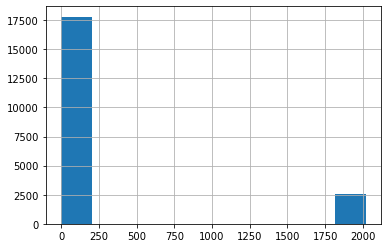

In [131]:
all_climbers_no_null_weight_height.years_climbing.hist()

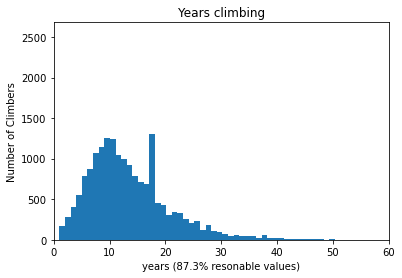

In [132]:
plt.hist(x = all_climbers_no_null_weight_height.years_climbing, bins = 2000)
plt.title('Years climbing')
plt.xlim(0, 60)
plt.ylabel('Number of Climbers')
plt.xlabel('years (87.3% resonable values)')
plt.savefig('years_climbing_all.png', dpi = 200)

In [133]:
len(all_climbers_no_null_weight_height[all_climbers_no_null_weight_height.years_climbing <=60])

17792

In [134]:
women_age = all_climbers_no_null_weight_height[all_climbers_no_null_weight_height.sex ==1]

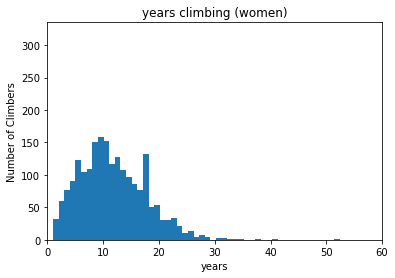

In [135]:
plt.hist(x = women_age.years_climbing, bins = 2000)
plt.title('years climbing (women)')
plt.xlim(0, 60)
plt.ylabel('Number of Climbers')
plt.xlabel('years')
plt.savefig('years_climbing_women.png', dpi = 200)

In [136]:
men_age = all_climbers_no_null_weight_height[all_climbers_no_null_weight_height.sex ==0]

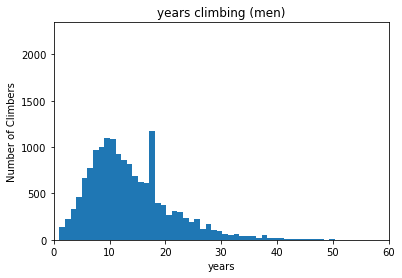

In [137]:
plt.hist(x = men_age.years_climbing, bins = 2000)
plt.title('years climbing (men)')
plt.xlim(0, 60)
plt.ylabel('Number of Climbers')
plt.xlabel('years')
plt.savefig('years_climbing_men.png', dpi = 200)

In [138]:
data_age = [all_climbers_no_null_weight_height["years_climbing"], women_age.years_climbing, men_age.years_climbing]
headers = ["Overall", "Women", 'Men']

In [139]:
age_overall_women_men = pd.concat(data_age, axis=1, keys=headers)

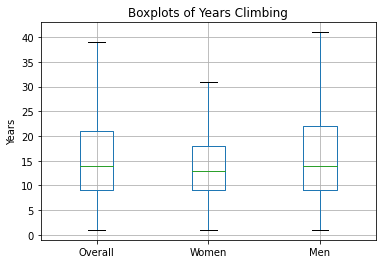

In [140]:
age_overall_women_men.boxplot(column=['Overall', 'Women', 'Men'], showfliers=False )
plt.title('Boxplots of Years Climbing')
plt.ylabel('Years')
# plt.legend(['intermediate<v6', 'advanced <v9', 'elite >=v10'],loc='best', fontsize = 'x-small', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
# plt.annotate('intermediate<v6\nadvanced <v9\nelite >v9', xy=(255, 31), xycoords='axes points',
#             size=8, ha='right', va='top',
#             bbox=dict(boxstyle='round', fc='w'))
# plt.legend(handletextpad=-2.0, handlelength=0)
plt.savefig('Boxplots_years_climbing_all.png', dpi = 200);

In [141]:
women_age.years_climbing.value_counts()

2018    319
10      159
11      152
9       150
18      132
13      128
6       123
12      116
8       109
14      107
7       105
15       97
5        90
16       86
4        77
17       76
3        59
20       54
19       51
23       34
22       31
21       30
2        29
24       21
26       13
25       10
28        8
29        5
27        4
32        3
1         3
31        3
34        2
38        1
52        1
35        1
33        1
41        1
Name: years_climbing, dtype: int64

In [142]:
men_age.years_climbing.value_counts()

2018    2233
18      1171
10      1098
11      1085
9        998
        ... 
76         1
112        1
96         1
93         1
55         1
Name: years_climbing, Length: 63, dtype: int64

Text(0, 0.5, 'Years')

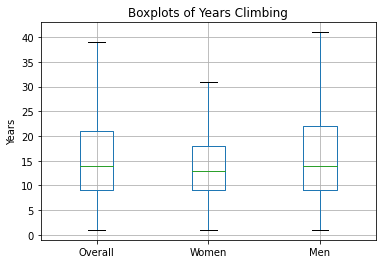

In [143]:
age_overall_women_men.boxplot(column=['Overall', 'Women', 'Men'], showfliers=False )
plt.title('Boxplots of Years Climbing')
plt.ylabel('Years')